In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [2]:
## randomized search
num_models = 1
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "d_ff": [128, 256],
        "Nx": [1, 2, 4],
        "n_head": [2, 4],
        "dropout": [0.5, 0.75],
        "lr": [7.5*10**-4, 2.5*10**-4]
    }
    config["tgt_step"] = k-1

    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 5*10**-5, n_epoch = 25, param_grid = param_grid, n_iter=48)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"param.json", "w") as outfile: 
    json.dump({"params": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/48 [00:00<?, ?it/s]

hyperparams: d_ff: 128, Nx: 2, n_head: 2, dropout: 0.5, lr: 0.00075, 


  2%|▏         | 1/48 [14:18<11:12:06, 858.01s/it]

Scores: 36913.56, 28324.71, 31002.12, 20677.49; avg score: 29229.47
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 4, dropout: 0.5, lr: 0.00025, 


  4%|▍         | 2/48 [23:37<8:43:15, 682.50s/it] 

Scores: 37706.54, 29252.82, 30871.21, 21882.49; avg score: 29928.27
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 4, dropout: 0.75, lr: 0.00075, 


  6%|▋         | 3/48 [32:56<7:49:35, 626.12s/it]

Scores: 36764.08, 28710.54, 30730.13, 21536.76; avg score: 29435.38
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 2, dropout: 0.5, lr: 0.00025, 


  8%|▊         | 4/48 [42:21<7:21:17, 601.77s/it]

Scores: 37637.18, 29576.50, 30904.41, 21994.33; avg score: 30028.11
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 4, dropout: 0.75, lr: 0.00075, 


 10%|█         | 5/48 [51:43<7:01:11, 587.71s/it]

Scores: 37359.78, 28816.31, 30732.37, 21399.65; avg score: 29577.03
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 4, dropout: 0.5, lr: 0.00075, 


 12%|█▎        | 6/48 [1:01:06<6:45:25, 579.17s/it]

Scores: 37797.48, 28880.02, 30831.78, 21649.39; avg score: 29789.67
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 2, dropout: 0.5, lr: 0.00025, 


 15%|█▍        | 7/48 [1:15:10<7:34:50, 665.63s/it]

Scores: 37845.49, 28955.85, 30946.76, 21293.04; avg score: 29760.29
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 4, dropout: 0.75, lr: 0.00075, 


 17%|█▋        | 8/48 [1:29:18<8:02:29, 723.73s/it]

Scores: 36944.09, 28794.82, 31071.14, 22170.39; avg score: 29745.11
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 4, dropout: 0.75, lr: 0.00025, 


 19%|█▉        | 9/48 [1:43:24<8:15:23, 762.15s/it]

Scores: 37664.07, 29452.13, 31029.28, 22878.62; avg score: 30256.03
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.75, lr: 0.00075, 


 21%|██        | 10/48 [2:07:28<10:15:51, 972.40s/it]

Scores: 36827.88, 29217.21, 31629.36, 22977.52; avg score: 30162.99
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 4, dropout: 0.75, lr: 0.00025, 


 23%|██▎       | 11/48 [2:16:49<8:42:02, 846.54s/it] 

Scores: 37891.51, 29356.86, 30536.72, 21665.65; avg score: 29862.68
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 2, dropout: 0.5, lr: 0.00075, 


 25%|██▌       | 12/48 [2:26:11<7:36:01, 760.04s/it]

Scores: 37162.89, 28486.99, 31124.80, 21924.12; avg score: 29674.70
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 4, dropout: 0.5, lr: 0.00075, 


 27%|██▋       | 13/48 [2:40:21<7:39:20, 787.43s/it]

Scores: 37023.58, 28423.18, 31099.11, 21572.46; avg score: 29529.58
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.75, lr: 0.00025, 


 29%|██▉       | 14/48 [3:04:26<9:18:45, 986.05s/it]

Scores: 37520.08, 29060.90, 31089.64, 22729.07; avg score: 30099.92
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 4, dropout: 0.5, lr: 0.00075, 


 31%|███▏      | 15/48 [3:18:30<8:38:42, 943.10s/it]

Scores: 37016.89, 28783.67, 31063.96, 21767.71; avg score: 29658.06
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 2, dropout: 0.75, lr: 0.00025, 


 33%|███▎      | 16/48 [3:32:35<8:07:14, 913.57s/it]

Scores: 37573.62, 29087.80, 31119.93, 22966.33; avg score: 30186.92
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 2, dropout: 0.5, lr: 0.00025, 


 35%|███▌      | 17/48 [3:46:41<7:41:33, 893.34s/it]

Scores: 37793.20, 29040.24, 30928.62, 22213.19; avg score: 29993.81
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 2, dropout: 0.5, lr: 0.00025, 


 38%|███▊      | 18/48 [3:56:06<6:37:14, 794.49s/it]

Scores: 37855.12, 29088.96, 31031.27, 21779.66; avg score: 29938.75
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 4, dropout: 0.75, lr: 0.00075, 


 40%|███▉      | 19/48 [4:10:16<6:32:05, 811.21s/it]

Scores: 37424.69, 29361.70, 31010.06, 21759.35; avg score: 29888.95
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00025, 


 42%|████▏     | 20/48 [4:34:53<7:51:53, 1011.19s/it]

Scores: 37686.72, 29670.69, 31013.78, 22531.19; avg score: 30225.60
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 2, dropout: 0.5, lr: 0.00075, 


 44%|████▍     | 21/48 [4:49:10<7:14:09, 964.79s/it] 

Scores: 37226.66, 28385.56, 31037.78, 21562.77; avg score: 29553.19
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 4, dropout: 0.75, lr: 0.00075, 


 46%|████▌     | 22/48 [5:13:40<8:03:52, 1116.63s/it]

Scores: 36443.59, 28979.25, 31290.61, 21997.15; avg score: 29677.65
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 4, dropout: 0.5, lr: 0.00025, 


 48%|████▊     | 23/48 [5:38:02<8:28:26, 1220.27s/it]

Scores: 38152.21, 29097.60, 30969.09, 21968.25; avg score: 30046.79
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 4, dropout: 0.75, lr: 0.00025, 


 50%|█████     | 24/48 [6:02:29<8:37:43, 1294.30s/it]

Scores: 37401.31, 29361.30, 31035.11, 22398.98; avg score: 30049.18
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 4, dropout: 0.5, lr: 0.00025, 


 52%|█████▏    | 25/48 [6:11:58<6:52:40, 1076.55s/it]

Scores: 37795.92, 29106.59, 30934.58, 22188.78; avg score: 30006.47
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 2, dropout: 0.75, lr: 0.00025, 


 54%|█████▍    | 26/48 [6:21:25<5:38:39, 923.64s/it] 

Scores: 38002.83, 29119.25, 30953.44, 21552.87; avg score: 29907.10
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 4, dropout: 0.5, lr: 0.00075, 


 56%|█████▋    | 27/48 [6:30:50<4:45:37, 816.08s/it]

Scores: 36978.79, 29187.57, 30920.58, 22351.72; avg score: 29859.67
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 4, dropout: 0.75, lr: 0.00075, 


 58%|█████▊    | 28/48 [6:55:12<5:36:35, 1009.75s/it]

Scores: 36790.44, 29173.13, 31094.92, 23140.73; avg score: 30049.81
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00075, 


 60%|██████    | 29/48 [7:19:33<6:02:38, 1145.19s/it]

Scores: 36652.59, 28489.67, 30754.13, 21696.01; avg score: 29398.10
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 2, dropout: 0.5, lr: 0.00075, 


 62%|██████▎   | 30/48 [7:29:00<4:51:34, 971.91s/it] 

Scores: 36917.25, 28672.55, 30872.65, 21362.44; avg score: 29456.22
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 2, dropout: 0.75, lr: 0.00025, 


 65%|██████▍   | 31/48 [7:38:29<4:01:03, 850.80s/it]

Scores: 37982.06, 29068.41, 30828.17, 21524.50; avg score: 29850.79
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 4, dropout: 0.5, lr: 0.00075, 


 67%|██████▋   | 32/48 [8:03:04<4:36:52, 1038.31s/it]

Scores: 36357.36, 28484.69, 30038.59, 21116.33; avg score: 28999.24
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 2, dropout: 0.75, lr: 0.00075, 


 69%|██████▉   | 33/48 [8:17:32<4:06:47, 987.16s/it] 

Scores: 36920.25, 29423.06, 31599.77, 22977.53; avg score: 30230.15
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 4, dropout: 0.5, lr: 0.00025, 


 71%|███████   | 34/48 [8:31:56<3:41:43, 950.28s/it]

Scores: 37679.22, 29082.07, 30927.67, 22615.34; avg score: 30076.07
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 4, dropout: 0.5, lr: 0.00025, 


 73%|███████▎  | 35/48 [8:46:40<3:21:32, 930.18s/it]

Scores: 37681.37, 28997.27, 31025.26, 21881.52; avg score: 29896.35
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.75, lr: 0.00075, 


 75%|███████▌  | 36/48 [9:11:50<3:40:50, 1104.17s/it]

Scores: 36930.59, 29246.13, 31440.75, 22051.99; avg score: 29917.36
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 4, dropout: 0.5, lr: 0.00025, 


 77%|███████▋  | 37/48 [9:36:10<3:42:01, 1211.03s/it]

Scores: 37734.79, 30056.96, 30940.26, 21177.01; avg score: 29977.26
--------------------
hyperparams: d_ff: 128, Nx: 1, n_head: 2, dropout: 0.75, lr: 0.00075, 


 79%|███████▉  | 38/48 [9:45:45<2:50:00, 1020.01s/it]

Scores: 37725.30, 28540.93, 31128.04, 22029.12; avg score: 29855.85
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 4, dropout: 0.5, lr: 0.00075, 


 81%|████████▏ | 39/48 [10:09:31<2:51:18, 1142.02s/it]

Scores: 36647.41, 27678.22, 30225.88, 21304.18; avg score: 28963.92
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 4, dropout: 0.75, lr: 0.00025, 


 83%|████████▎ | 40/48 [10:18:42<2:08:36, 964.59s/it] 

Scores: 38151.17, 28884.09, 30842.80, 21303.49; avg score: 29795.39
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00025, 


 85%|████████▌ | 41/48 [10:42:41<2:09:08, 1106.95s/it]

Scores: 37848.55, 28993.80, 30950.51, 21678.76; avg score: 29867.90
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 4, dropout: 0.75, lr: 0.00025, 


 88%|████████▊ | 42/48 [11:06:23<2:00:08, 1201.39s/it]

Scores: 37487.55, 29782.96, 31133.91, 22324.86; avg score: 30182.32
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 2, dropout: 0.75, lr: 0.00025, 


 90%|████████▉ | 43/48 [11:20:13<1:30:50, 1090.10s/it]

Scores: 37756.22, 29291.43, 31063.68, 22404.62; avg score: 30128.99
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.75, lr: 0.00025, 


 92%|█████████▏| 44/48 [11:44:11<1:19:37, 1194.34s/it]

Scores: 37584.24, 29516.43, 31129.30, 21953.53; avg score: 30045.87
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00075, 


 94%|█████████▍| 45/48 [12:08:01<1:03:15, 1265.04s/it]

Scores: 36403.05, 27745.38, 31159.75, 21261.09; avg score: 29142.32
--------------------
hyperparams: d_ff: 128, Nx: 2, n_head: 4, dropout: 0.75, lr: 0.00025, 


 96%|█████████▌| 46/48 [12:21:50<37:48, 1134.40s/it]  

Scores: 37856.79, 28918.56, 30926.05, 22588.53; avg score: 30072.48
--------------------
hyperparams: d_ff: 256, Nx: 1, n_head: 2, dropout: 0.75, lr: 0.00075, 


 98%|█████████▊| 47/48 [12:31:06<16:00, 960.81s/it] 

Scores: 36955.69, 29273.85, 30850.10, 21894.57; avg score: 29743.55
--------------------
hyperparams: d_ff: 256, Nx: 2, n_head: 2, dropout: 0.75, lr: 0.00075, 


100%|██████████| 48/48 [12:45:05<00:00, 956.37s/it]

Scores: 36317.55, 28963.91, 31051.63, 22405.73; avg score: 29684.71
--------------------
Best params: {'d_ff': 128, 'Nx': 4, 'n_head': 4, 'dropout': 0.5, 'lr': 0.00075}
----------------------------------------


In [3]:
best_params

{'d_ff': 128, 'Nx': 4, 'n_head': 4, 'dropout': 0.5, 'lr': 0.00075}

In [2]:
best_model_params = {'d_ff': 128, 'Nx': 4, 'n_head': 4, 'dropout': 0.5, 'lr': 0.00075}

In [3]:
## Multiple model training
cfg = get_config()
num_models0 = 1
num_models1 = 1

for k in range(num_models0, num_models1+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = None

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in best_model_params.keys():
        cfg[param_name] = best_model_params[param_name]

    model, summary = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:29<00:00, 21.11it/s, loss=76001.000]


Training loss of epoch 0: 31529.82386306909


100%|██████████| 14/14 [00:01<00:00,  9.49it/s]


Validation loss of epoch 0: 29433.8671875


Processing Epoch 01: 100%|██████████| 626/626 [00:29<00:00, 21.13it/s, loss=4683.780] 


Training loss of epoch 1: 28492.03971926168


100%|██████████| 14/14 [00:01<00:00,  9.75it/s]


Validation loss of epoch 1: 28802.73828125


Processing Epoch 02: 100%|██████████| 626/626 [00:29<00:00, 21.23it/s, loss=5986.777] 


Training loss of epoch 2: 25996.603056983826


100%|██████████| 14/14 [00:01<00:00,  9.85it/s]


Validation loss of epoch 2: 28794.841796875


Processing Epoch 03: 100%|██████████| 626/626 [00:29<00:00, 20.95it/s, loss=6528.521] 


Training loss of epoch 3: 24089.526495107828


100%|██████████| 14/14 [00:01<00:00,  9.91it/s]


Validation loss of epoch 3: 29636.931640625


Processing Epoch 04: 100%|██████████| 626/626 [00:29<00:00, 21.02it/s, loss=2548.930] 


Training loss of epoch 4: 22731.18348454972


100%|██████████| 14/14 [00:01<00:00,  9.78it/s]


Validation loss of epoch 4: 27296.884765625


Processing Epoch 05: 100%|██████████| 626/626 [00:29<00:00, 21.20it/s, loss=12660.438]


Training loss of epoch 5: 21633.190418767474


100%|██████████| 14/14 [00:01<00:00,  9.57it/s]


Validation loss of epoch 5: 26653.19140625


Processing Epoch 06: 100%|██████████| 626/626 [00:29<00:00, 21.41it/s, loss=16125.758]


Training loss of epoch 6: 20806.727025821187


100%|██████████| 14/14 [00:01<00:00,  9.70it/s]


Validation loss of epoch 6: 28543.064453125


Processing Epoch 07: 100%|██████████| 626/626 [00:29<00:00, 21.26it/s, loss=2982.490] 


Training loss of epoch 7: 20206.728984796202


100%|██████████| 14/14 [00:01<00:00,  9.49it/s]


Validation loss of epoch 7: 27720.080078125


Processing Epoch 08: 100%|██████████| 626/626 [00:29<00:00, 21.08it/s, loss=54894.898]


Training loss of epoch 8: 19886.733376597444


100%|██████████| 14/14 [00:01<00:00,  9.50it/s]


Validation loss of epoch 8: 29740.37109375


Processing Epoch 09: 100%|██████████| 626/626 [00:29<00:00, 21.04it/s, loss=42322.664]


Training loss of epoch 9: 19589.963778267273


100%|██████████| 14/14 [00:01<00:00,  9.68it/s]


Validation loss of epoch 9: 30116.396484375


Processing Epoch 10: 100%|██████████| 626/626 [00:29<00:00, 21.31it/s, loss=6036.728] 


Training loss of epoch 10: 19324.091221233528


100%|██████████| 14/14 [00:01<00:00,  9.14it/s]


Validation loss of epoch 10: 29178.787109375


Processing Epoch 11: 100%|██████████| 626/626 [00:29<00:00, 21.09it/s, loss=11807.843]


Training loss of epoch 11: 19124.77392578125


100%|██████████| 14/14 [00:01<00:00,  9.40it/s]


Validation loss of epoch 11: 30527.45703125


Processing Epoch 12: 100%|██████████| 626/626 [00:29<00:00, 21.13it/s, loss=579.001]  


Training loss of epoch 12: 18968.72727746933


100%|██████████| 14/14 [00:01<00:00,  9.61it/s]


Validation loss of epoch 12: 33311.515625


Processing Epoch 13: 100%|██████████| 626/626 [00:29<00:00, 21.22it/s, loss=1551.547] 


Training loss of epoch 13: 18832.481986048886


100%|██████████| 14/14 [00:01<00:00,  8.24it/s]


Validation loss of epoch 13: 33072.79296875


Processing Epoch 14: 100%|██████████| 626/626 [00:29<00:00, 21.32it/s, loss=4114.688] 


Training loss of epoch 14: 18737.250615421577


100%|██████████| 14/14 [00:01<00:00,  9.42it/s]


Validation loss of epoch 14: 35916.265625


Processing Epoch 15: 100%|██████████| 626/626 [00:29<00:00, 21.09it/s, loss=16855.006]


Training loss of epoch 15: 18660.221646927417


100%|██████████| 14/14 [00:01<00:00,  9.43it/s]


Validation loss of epoch 15: 32541.546875


Processing Epoch 16: 100%|██████████| 626/626 [00:30<00:00, 20.78it/s, loss=12636.641]


Training loss of epoch 16: 18594.239641573484


100%|██████████| 14/14 [00:01<00:00, 10.42it/s]


Validation loss of epoch 16: 36628.0625


Processing Epoch 17: 100%|██████████| 626/626 [00:28<00:00, 22.01it/s, loss=22173.160]


Training loss of epoch 17: 18528.014213196388


100%|██████████| 14/14 [00:01<00:00,  8.91it/s]


Validation loss of epoch 17: 40601.14453125


Processing Epoch 18: 100%|██████████| 626/626 [00:28<00:00, 22.05it/s, loss=11887.290]


Training loss of epoch 18: 18455.66851943141


100%|██████████| 14/14 [00:01<00:00,  9.15it/s]


Validation loss of epoch 18: 36936.8359375


Processing Epoch 19: 100%|██████████| 626/626 [00:28<00:00, 22.23it/s, loss=19479.900]


Training loss of epoch 19: 18410.725564097444


100%|██████████| 14/14 [00:01<00:00,  9.48it/s]


Validation loss of epoch 19: 35170.70703125


Processing Epoch 20: 100%|██████████| 626/626 [00:28<00:00, 22.07it/s, loss=82634.469]


Training loss of epoch 20: 18464.94904246955


100%|██████████| 14/14 [00:01<00:00,  9.33it/s]


Validation loss of epoch 20: 36952.09765625


Processing Epoch 21: 100%|██████████| 626/626 [00:28<00:00, 21.97it/s, loss=4463.969] 


Training loss of epoch 21: 18282.55053164936


100%|██████████| 14/14 [00:01<00:00,  9.73it/s]


Validation loss of epoch 21: 39361.90234375


Processing Epoch 22: 100%|██████████| 626/626 [00:28<00:00, 22.11it/s, loss=20209.711]


Training loss of epoch 22: 18250.40162926817


100%|██████████| 14/14 [00:01<00:00,  9.43it/s]


Validation loss of epoch 22: 43026.53515625


Processing Epoch 23: 100%|██████████| 626/626 [00:28<00:00, 22.04it/s, loss=4745.236] 


Training loss of epoch 23: 18214.90084770617


100%|██████████| 14/14 [00:01<00:00,  8.79it/s]


Validation loss of epoch 23: 41606.59375


Processing Epoch 24: 100%|██████████| 626/626 [00:28<00:00, 22.09it/s, loss=87334.695]


Training loss of epoch 24: 18282.203783321685


100%|██████████| 14/14 [00:01<00:00,  9.58it/s]


Validation loss of epoch 24: 39896.5078125


Processing Epoch 25: 100%|██████████| 626/626 [00:28<00:00, 22.26it/s, loss=15381.148]


Training loss of epoch 25: 18185.616783458965


100%|██████████| 14/14 [00:01<00:00,  9.36it/s]


Validation loss of epoch 25: 43727.6171875


Processing Epoch 26: 100%|██████████| 626/626 [00:28<00:00, 21.91it/s, loss=11758.945]


Training loss of epoch 26: 18097.80599322334


100%|██████████| 14/14 [00:01<00:00,  8.96it/s]


Validation loss of epoch 26: 44714.05859375


Processing Epoch 27: 100%|██████████| 626/626 [00:28<00:00, 22.15it/s, loss=13214.500]


Training loss of epoch 27: 18078.5143738768


100%|██████████| 14/14 [00:01<00:00,  9.27it/s]


Validation loss of epoch 27: 44578.19921875


Processing Epoch 28: 100%|██████████| 626/626 [00:28<00:00, 21.91it/s, loss=7399.742] 


Training loss of epoch 28: 18036.911992374702


100%|██████████| 14/14 [00:01<00:00,  9.40it/s]


Validation loss of epoch 28: 42574.21484375


Processing Epoch 29: 100%|██████████| 626/626 [00:28<00:00, 22.14it/s, loss=13409.788]


Training loss of epoch 29: 18022.307080546125


100%|██████████| 14/14 [00:01<00:00,  9.51it/s]


Validation loss of epoch 29: 38508.19140625


Processing Epoch 30: 100%|██████████| 626/626 [00:27<00:00, 22.41it/s, loss=15765.750]


Training loss of epoch 30: 17990.772752658246


100%|██████████| 14/14 [00:01<00:00,  9.14it/s]


Validation loss of epoch 30: 37331.6953125


Processing Epoch 31: 100%|██████████| 626/626 [00:28<00:00, 22.24it/s, loss=9415.445] 


Training loss of epoch 31: 17960.334482016275


100%|██████████| 14/14 [00:01<00:00,  8.64it/s]


Validation loss of epoch 31: 42698.3515625


Processing Epoch 32: 100%|██████████| 626/626 [00:28<00:00, 22.23it/s, loss=36554.094]


Training loss of epoch 32: 17971.051537851938


100%|██████████| 14/14 [00:01<00:00,  9.53it/s]


Validation loss of epoch 32: 47883.5390625


Processing Epoch 33: 100%|██████████| 626/626 [00:28<00:00, 22.23it/s, loss=5879.300] 


Training loss of epoch 33: 17889.2824613431


100%|██████████| 14/14 [00:01<00:00,  9.30it/s]


Validation loss of epoch 33: 51936.59765625


Processing Epoch 34: 100%|██████████| 626/626 [00:28<00:00, 21.92it/s, loss=24433.637]


Training loss of epoch 34: 17892.71270342452


100%|██████████| 14/14 [00:01<00:00,  9.34it/s]


Validation loss of epoch 34: 51285.51953125


Processing Epoch 35: 100%|██████████| 626/626 [00:28<00:00, 22.12it/s, loss=10312.973]


Training loss of epoch 35: 17850.466391273963


100%|██████████| 14/14 [00:01<00:00,  8.93it/s]


Validation loss of epoch 35: 46142.6328125


Processing Epoch 36: 100%|██████████| 626/626 [00:28<00:00, 22.05it/s, loss=29339.109]


Training loss of epoch 36: 17874.394872890876


100%|██████████| 14/14 [00:01<00:00,  8.90it/s]


Validation loss of epoch 36: 43906.53125


Processing Epoch 37: 100%|██████████| 626/626 [00:28<00:00, 22.28it/s, loss=2954.504] 


Training loss of epoch 37: 17802.0669538114


100%|██████████| 14/14 [00:01<00:00,  9.05it/s]


Validation loss of epoch 37: 49181.2265625


Processing Epoch 38: 100%|██████████| 626/626 [00:28<00:00, 22.11it/s, loss=9906.891] 


Training loss of epoch 38: 17798.33326209315


100%|██████████| 14/14 [00:01<00:00,  9.09it/s]


Validation loss of epoch 38: 55733.3515625


Processing Epoch 39: 100%|██████████| 626/626 [00:28<00:00, 21.92it/s, loss=11546.312]


Training loss of epoch 39: 17763.46102330022


100%|██████████| 14/14 [00:01<00:00,  8.77it/s]


Validation loss of epoch 39: 47066.74609375
--------------------


In [4]:
print(summary)

{'best_loss': 26653.19140625, 'best_epoch': 5}


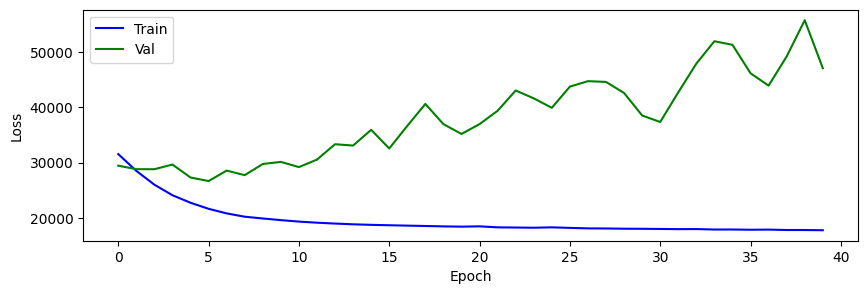

In [19]:
inference_helpers.arrange_figures_in_rows(n_rows=1, prefix="forward_")